# Prediction of Credit Card User Delinquency


LINK: https://dacon.io/en/competitions/official/235713/overview/description

## Variable Description

- **index**
- **gender**: 성별
- **car**: 차량 소유 여부
- **reality**: 부동산 소유 여부 (Whether the user owns real estate)
- **child_num**: 자녀 수
- **income_total**: 연간 소득
- **income_type**: 소득 분류
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

- **edu_type**: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- **family_type**: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- **house_type**: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents',

							 'Co-op apartment', 'Rented apartment', 'Office apartment']

- **DAYS_BIRTH**: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
              (Count backwards from (0) at the time of data collection, i.e., -1 means you were born one day before the data collection date.)

- **DAYS_EMPLOYED**: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미, 양수 값은 고용되지 않은 상태를 의미함
              (Count backwards from (0) at the time of data collection, i.e., -1 means starting work one day before the data collection date, positive values ​​indicate unemployed status.)

- **FLAG_MOBIL**: 핸드폰 소유 여부
- **work_phone**: 업무용 전화 소유 여부
- **phone**: 전화 소유 여부
- **email**: 이메일 소유 여부
- **occyp_type**: 직업 유형													
- **family_size**: 가족 규모
- **begin_month**: 신용카드 발급 월
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미 
      (Count backwards from (0) at the time of data collection, that is, -1 means that the credit card was issued one month before the data collection date.)

- **credit**: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							낮을 수록 높은 신용의 신용카드 사용자를 의미함 
              (The lower the number, the higher the credit card user.)

## Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

# matplotlib 한글 폰트 출력코드 (Korean)
try : 
    if platform.system() == 'Windows':
    # Window
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

## DATA

In [3]:
df=pd.read_csv("/content/drive/MyDrive/MLforAI_proj/data/train.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
df.shape

(26457, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [6]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

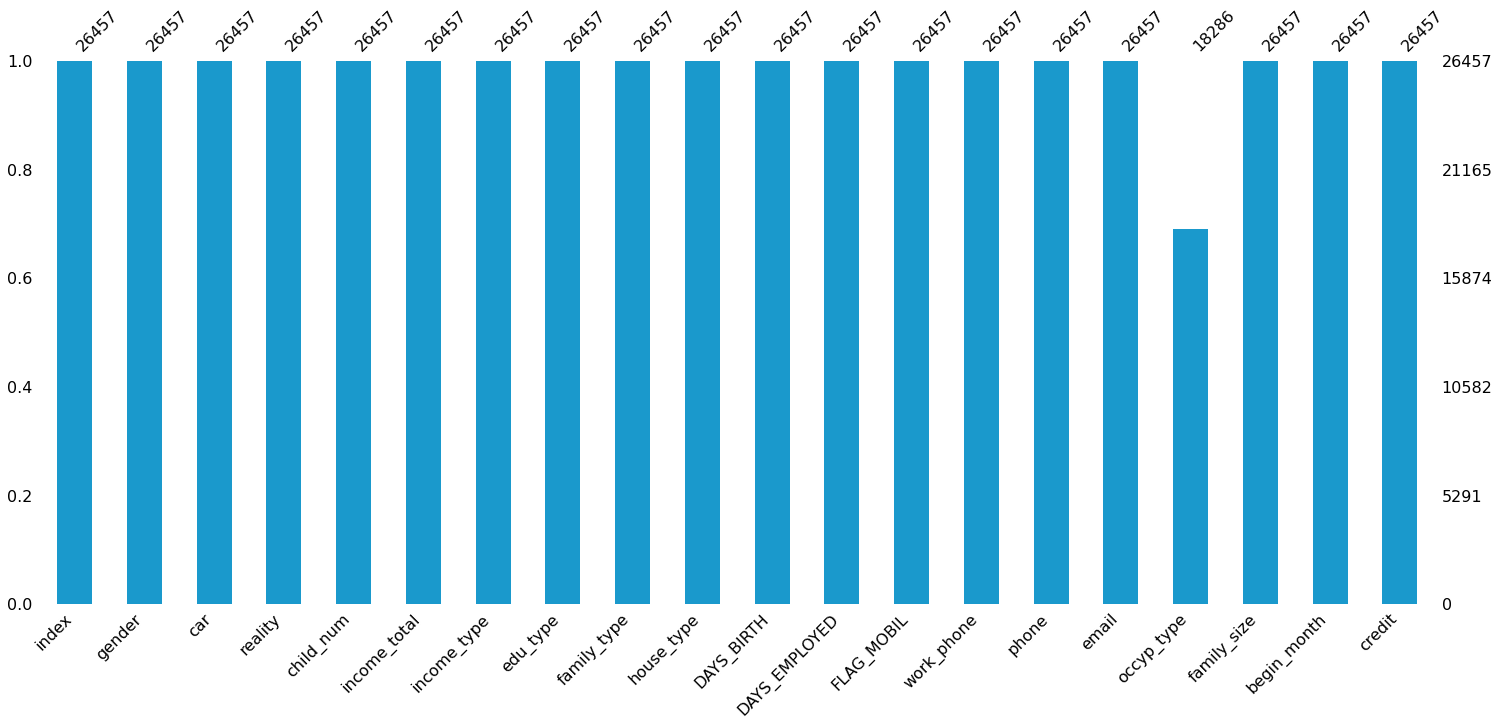

In [7]:
import missingno as msno
msno.bar(df=df.iloc[:, :], color=(0.1, 0.6, 0.8))

*Missing values exist in the occyp_type column.*

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00
mean,13228.00,0.43,187306.52,-15958.05,59068.75,1.00,0.22,0.29,0.09,2.20,-26.12,1.52
std,7637.62,0.75,101878.37,4201.59,137475.43,0.00,0.42,0.46,0.29,0.92,16.56,0.70
min,0.00,0.00,27000.00,-25152.00,-15713.00,1.00,0.00,0.00,0.00,1.00,-60.00,0.00
25%,6614.00,0.00,121500.00,-19431.00,-3153.00,1.00,0.00,0.00,0.00,2.00,-39.00,1.00
50%,13228.00,0.00,157500.00,-15547.00,-1539.00,1.00,0.00,0.00,0.00,2.00,-24.00,2.00
75%,19842.00,1.00,225000.00,-12446.00,-407.00,1.00,0.00,1.00,0.00,3.00,-12.00,2.00
max,26456.00,19.00,1575000.00,-7705.00,365243.00,1.00,1.00,1.00,1.00,20.00,0.00,2.00


- There is a family with 19 children.
- FLAG_MOBIL: mean=1, std=0 → Everyone owns a cell phone.
- If DAYS_EMPLOYED is a positive value, the value needs to be modified because it is not employed.

In [9]:
df['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [10]:
df['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [11]:
df['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [12]:
df['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

## Visualization

### Credit

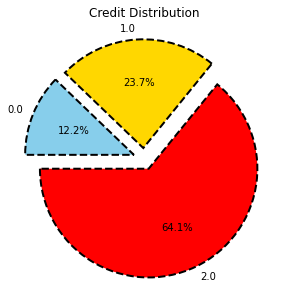

In [69]:
df1= df.groupby('credit').count()['index']
explode = (0.1, 0.1, 0.1)
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold', 'red'],explode=explode, startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Credit Distribution')
plt.show()

*There are many low-credit users.*

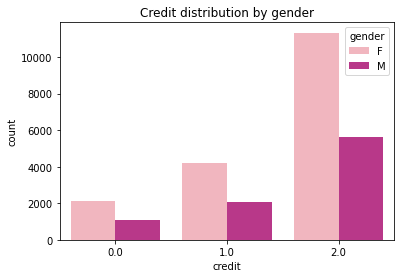

In [70]:
sns.countplot(data=df, x="credit",hue='gender',palette="RdPu")
plt.title('Credit distribution by gender')
plt.show()

### Analysis by Credibility

In [18]:
train_0 = df[df['credit']==0.0]
train_1 = df[df['credit']==1.0]
train_2 = df[df['credit']==2.0]

In [19]:
# Categorical graph func
def cat_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

In [21]:
# Numerical graph func
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

### Gender

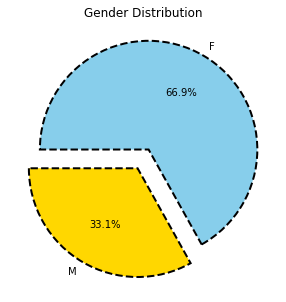

In [43]:
df1= df.groupby('gender').count()['index']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold'],explode=explode, startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Gender Distribution')
plt.show()

The difference between male and female ratios is about twice as large.

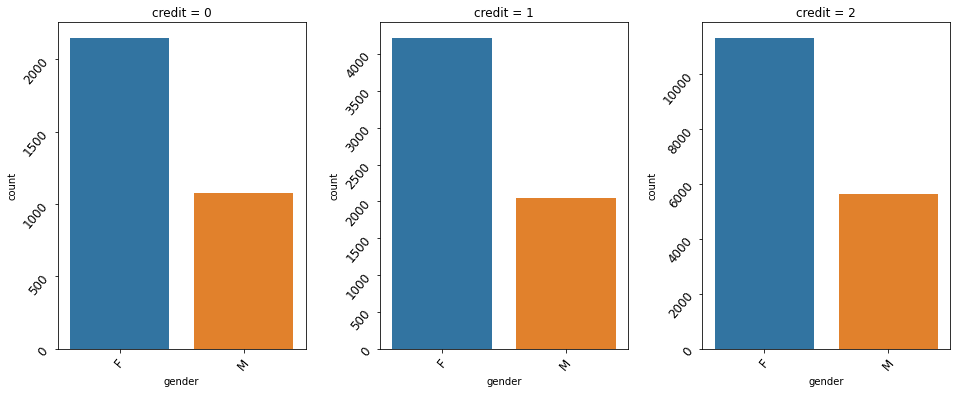

In [20]:
# Are there gender differences in credibility?

cat_plot("gender")

### Age (DAYS_BIRTH)

In [22]:
import numpy as np
# new_age col 
df['new_age'] = round(abs(df['DAYS_BIRTH'])/365,0).astype(np.int32)
df.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,new_age
0,0,F,N,N,0,202500.00,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.00,-6.00,1.00,38
1,1,F,N,Y,1,247500.00,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.00,-5.00,1.00,31


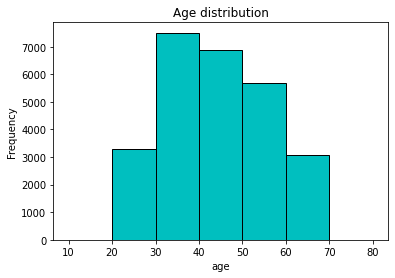

In [23]:
df['new_age'].plot.hist(bins=range(10,81,10),color='c', edgecolor='k')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

*Most of them are in their 30s, 40s, and 50s.*

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


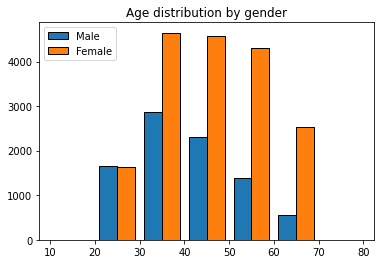

In [24]:
# Distribution by gender

sex = df.groupby('gender')
M_group= sex.get_group('M')
F_group= sex.get_group('F')
M = M_group['new_age']
F = F_group['new_age']

plt.hist([M,F], bins=range(10,81,10), label=['Male', 'Female'],edgecolor='k')
plt.legend(loc='upper left')
plt.title('Age distribution by gender')
plt.show()

In [26]:
train_0['Age'] = abs(train_0['DAYS_BIRTH'])/365
train_1['Age'] = abs(train_1['DAYS_BIRTH'])/365
train_2['Age'] = abs(train_2['DAYS_BIRTH'])/365
train_0['Age'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

3    41.34
7    40.81
12   32.71
15   35.23
22   41.64
Name: Age, dtype: float64

In [27]:
train_0 = train_0.astype({'Age': 'int'})
train_1 = train_1.astype({'Age': 'int'})
train_2 = train_2.astype({'Age': 'int'})
train_0['Age'].head()

3     41
7     40
12    32
15    35
22    41
Name: Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

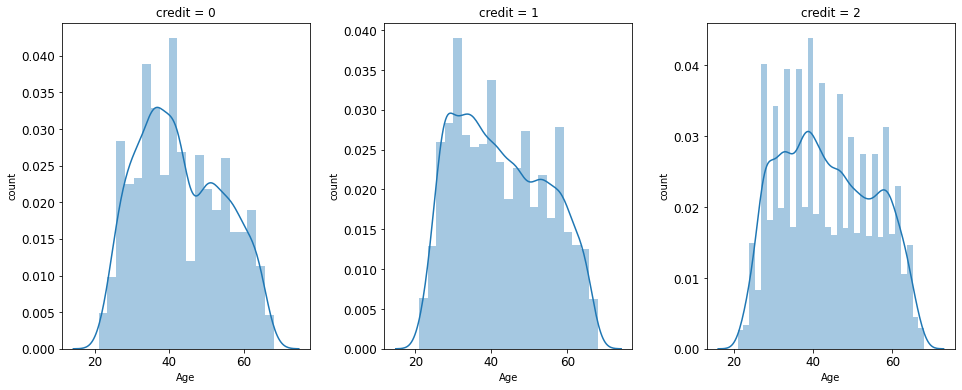

In [28]:
num_plot("Age")

*There seems to be no significant difference between grades.*

### Car

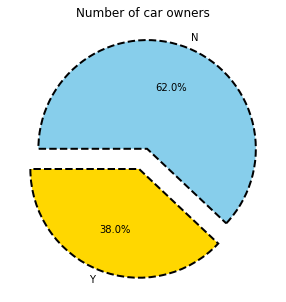

In [29]:
df1= df.groupby('car').count()['index']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold'],explode=explode, startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Number of car owners')
plt.show()

*Twice as many people do not own a car.*

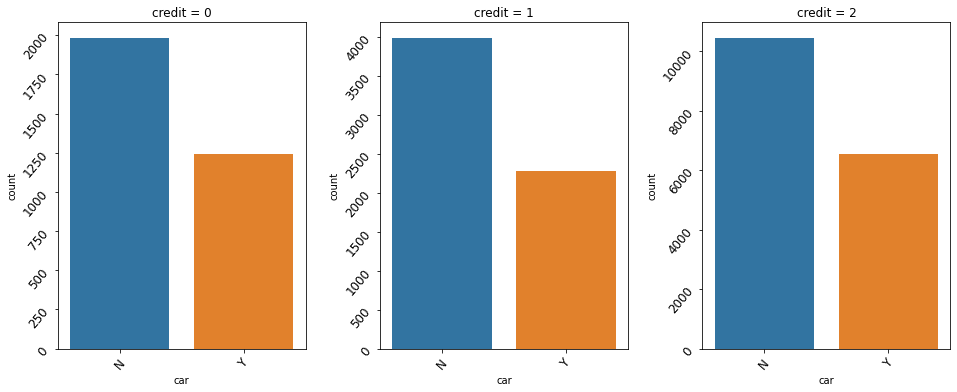

In [30]:
cat_plot('car')

*There were more customers in all classes who did not own a car.*

### Whether the user owns real estate (reality)

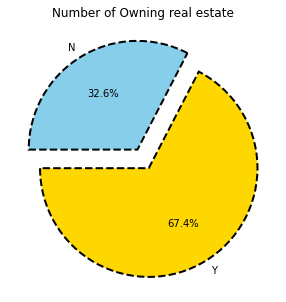

In [32]:
df1= df.groupby('reality').count()['index']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold'],explode=explode, startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Number of Owning real estate')
plt.show()

*Twice as many people own real estate.*

→ This is a different result from the expectation that more people own cars.

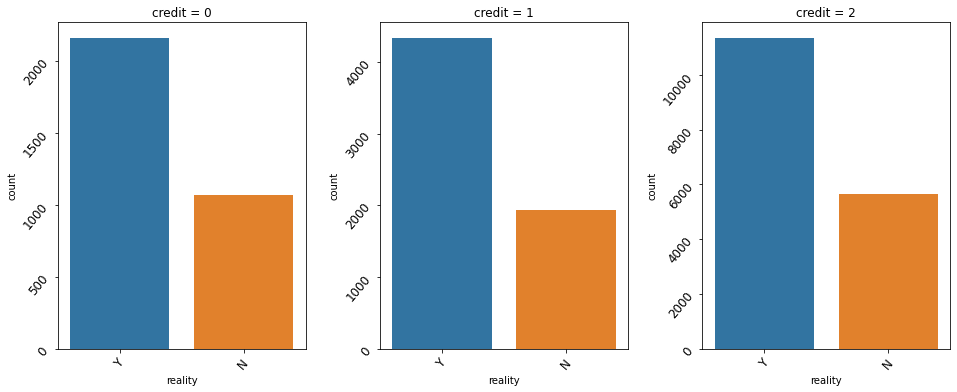

In [33]:
cat_plot('reality')

*There were more people owning real estate in all classes. There is no significant difference by grade.*

### Income Type (income_type)

In [34]:
it = df.groupby('income_type').count()['index']
it

income_type
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Working                 13645
Name: index, dtype: int64

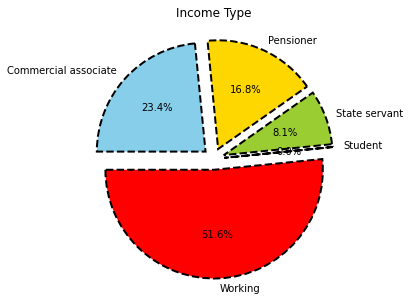

In [52]:
df1= df.groupby('income_type').count()['index']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold', 'yellowgreen', 'lightcoral', 'red'], explode=explode, startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Income Type')
plt.show()

*Most of them are workers. (pensioner: 연금 수령자)*

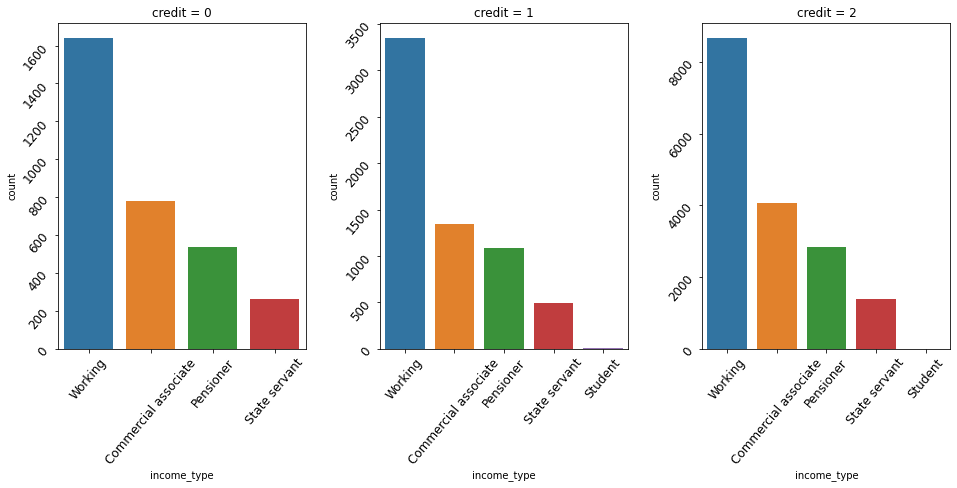

In [44]:
cat_plot('income_type') 

*There are no students in the high credit class.*

*It is assumed that this is because it is difficult to have high credit due to the nature of a student's status.*

*On the other hand, there are a small number of students in the low credit group.*

### Education Type (edu_type)

In [45]:
et = df.groupby('edu_type').count()['index']
et = et.reset_index()
et

,edu_type,index
0,Academic degree,23
1,Higher education,7162
2,Incomplete higher,1020
3,Lower secondary,257
4,Secondary / secondary special,17995


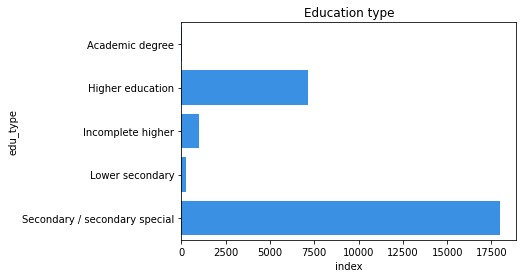

In [46]:
sns.barplot(data=et, y="edu_type", x="index", orient='h',color='dodgerblue')
title_color = 'black'
plt.title('Education type',color=title_color)
plt.show()

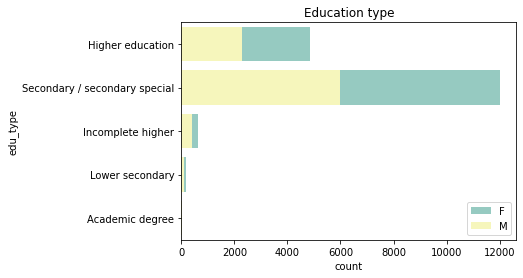

In [49]:
# cumulative sum (by gender)
sns.countplot(data=df, y="edu_type",hue='gender', palette='Set3',dodge=False)
plt.legend(loc='lower right')
title_color = 'black'
plt.title('Education type',color=title_color)
plt.show()

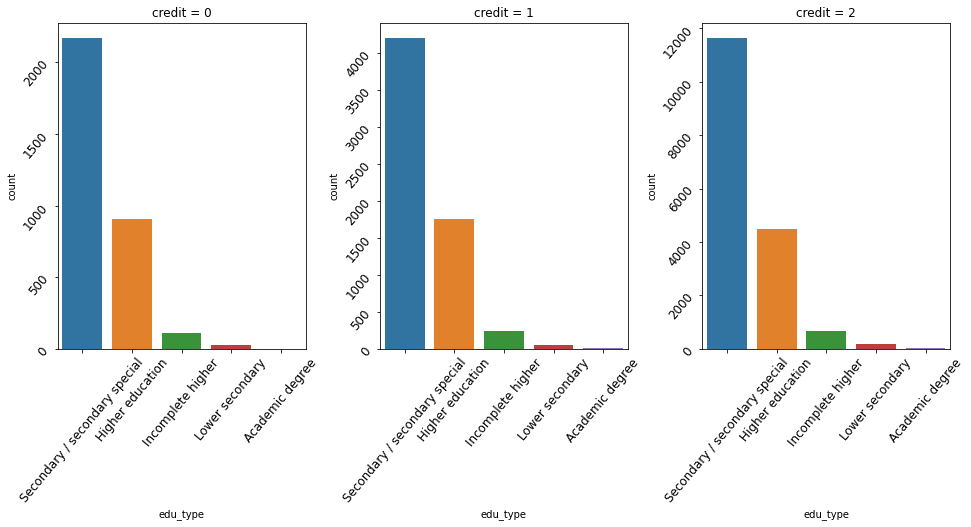

In [50]:
cat_plot('edu_type')

*The ranking of education level was the same in all classes.*

### Family Type (family_type)

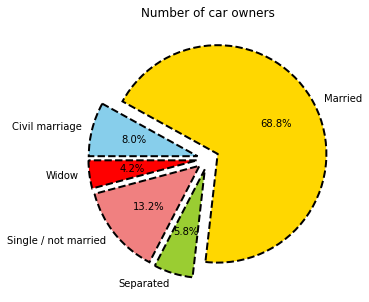

In [51]:
df1= df.groupby('family_type').count()['index']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold', 'yellowgreen', 'lightcoral', 'red'], explode=explode, startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('Number of car owners')
plt.show()

*Most of them are married.*

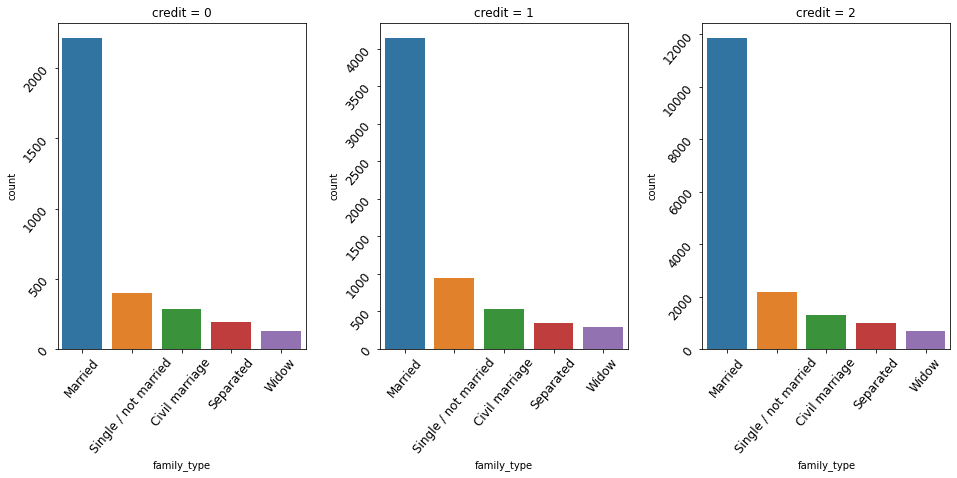

In [53]:
cat_plot('family_type')

### Employment Start Date (DAYS_EMPLOYED)

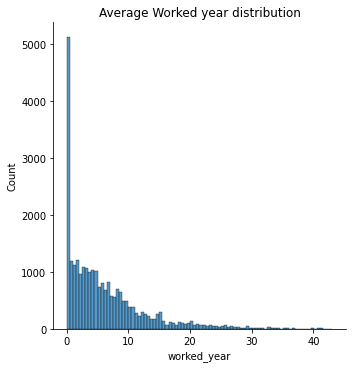

In [55]:
df['worked_year'] = [0 if s >=0 else round(abs(s)/365,2) for s in df['DAYS_EMPLOYED']]
sns.displot(data=df,x="worked_year",kind='hist')
plt.title('Average Worked year distribution')
plt.show()

*The number of people who have not started working is the highest.*

In [56]:
train_0['EMPLOYED']= train_0['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_1['EMPLOYED']= train_1['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_2['EMPLOYED']= train_2['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_0['EMPLOYED'] = abs(train_0['EMPLOYED'])/365
train_1['EMPLOYED'] = abs(train_1['EMPLOYED'])/365
train_2['EMPLOYED'] = abs(train_2['EMPLOYED'])/365
train_0['EMPLOYED'].head()

3     5.73
7    14.85
12    5.92
15   11.11
22    3.72
Name: EMPLOYED, dtype: float64

In [57]:
train_0 = train_0.astype({'EMPLOYED': 'int'})
train_1 = train_1.astype({'EMPLOYED': 'int'})
train_2 = train_2.astype({'EMPLOYED': 'int'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

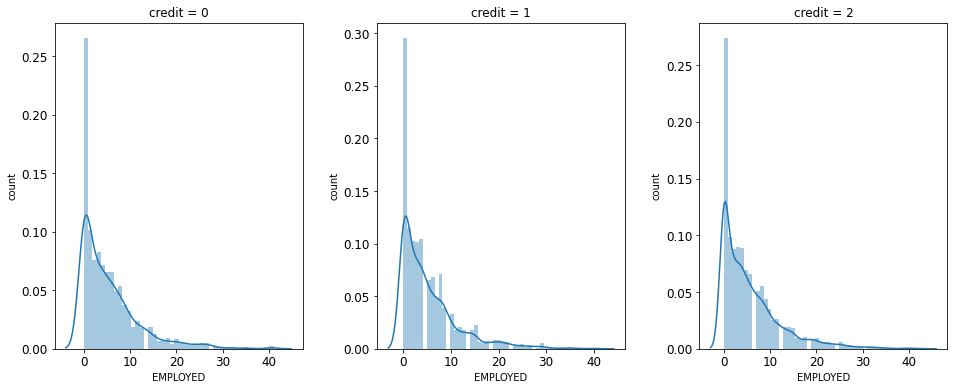

In [58]:
num_plot("EMPLOYED")

### Income Total (income_total)

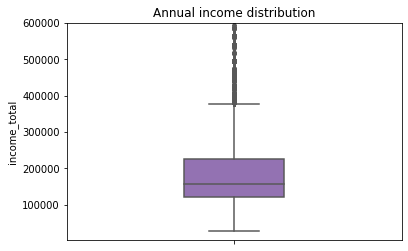

In [59]:
sns.boxplot(data=df,y="income_total", width=0.3, color='tab:purple')
plt.title('Annual income distribution')
plt.ylim(2000, 600000)
plt.show()

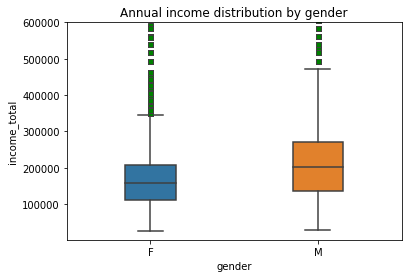

In [60]:
green = dict(markerfacecolor='g', marker='s')
sns.boxplot(data=df,y="income_total",x='gender', width=0.3,flierprops=green)
plt.title('Annual income distribution by gender')
plt.ylim(2000, 600000)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

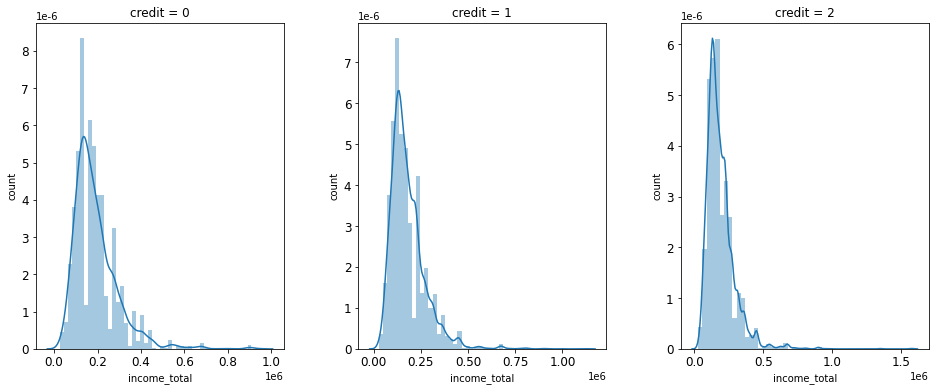

In [61]:
num_plot("income_total")

*There seems to be no difference in annual income depending on credit rating. → Let's overlap the graphs for a more precise comparison.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

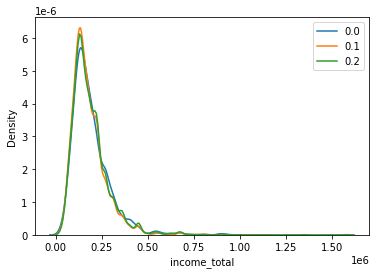

In [62]:
sns.distplot(train_0['income_total'],label='0.0', hist=False)
sns.distplot(train_1['income_total'],label='0.1', hist=False)
sns.distplot(train_2['income_total'],label='0.2', hist=False)
plt.legend()

### Months of issue of credit card (begin_month)

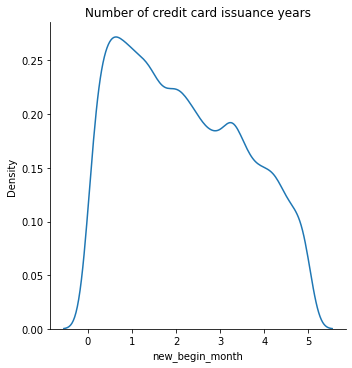

In [65]:
df['new_begin_month'] = [0 if s >=0 else round(abs(s)/12,2) for s in df['begin_month']] # year
sns.displot(data=df,x='new_begin_month',kind='kde')
title_color = 'black'
plt.title('Number of credit card issuance years',color=title_color)
plt.show()

In [66]:
train_0['Month'] = abs(train_0['begin_month'])
train_1['Month'] = abs(train_1['begin_month'])
train_2['Month'] = abs(train_2['begin_month'])
train_0 = train_0.astype({'Month': 'int'})
train_1 = train_1.astype({'Month': 'int'})
train_2 = train_2.astype({'Month': 'int'})
train_0['Month'].head()

3     37
7     53
12    60
15    60
22    22
Name: Month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

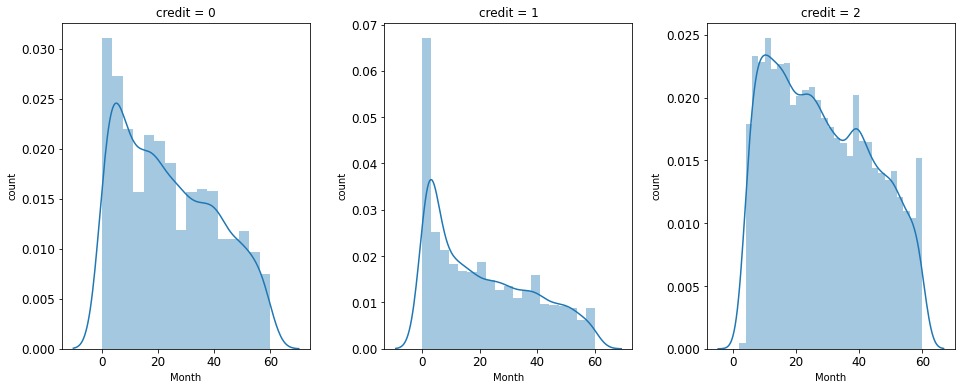

In [67]:
num_plot("Month")

*Most of them are people who have been issued a card for less than 10 months.*

### Number of children (child_num)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

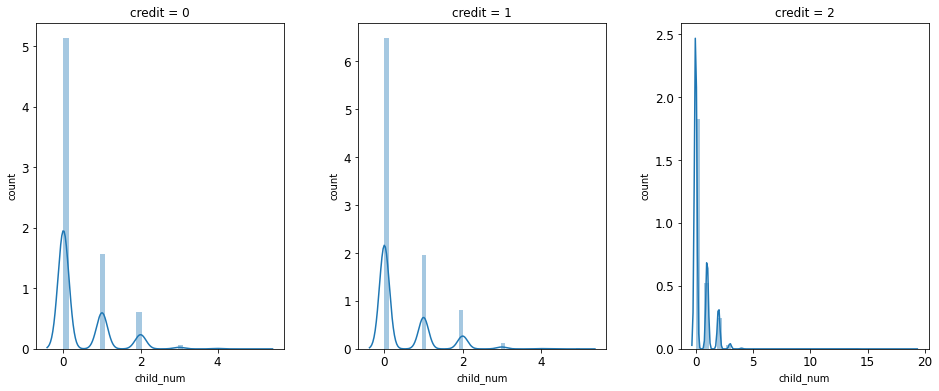

In [74]:
num_plot("child_num")

### Type of Job (occyp_type)

[Text(0, 0, 'Accountants'),
 Text(0, 0, 'Cleaning staff'),
 Text(0, 0, 'Cooking staff'),
 Text(0, 0, 'Core staff'),
 Text(0, 0, 'Drivers'),
 Text(0, 0, 'HR staff'),
 Text(0, 0, 'High skill tech staff'),
 Text(0, 0, 'IT staff'),
 Text(0, 0, 'Laborers'),
 Text(0, 0, 'Low-skill Laborers'),
 Text(0, 0, 'Managers'),
 Text(0, 0, 'Medicine staff'),
 Text(0, 0, 'Private service staff'),
 Text(0, 0, 'Realty agents'),
 Text(0, 0, 'Sales staff'),
 Text(0, 0, 'Secretaries'),
 Text(0, 0, 'Security staff'),
 Text(0, 0, 'Waiters/barmen staff')]

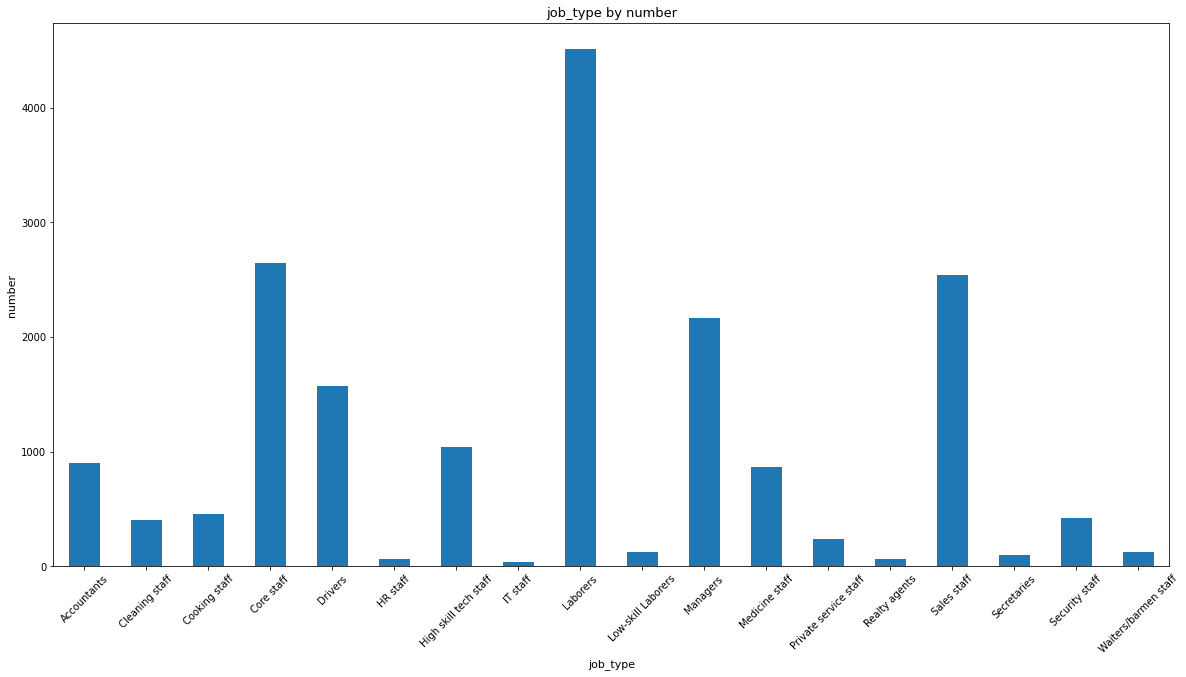

In [71]:
ot = df.groupby('occyp_type').count()['index']
plot = ot.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('job_type',fontsize=11)
plot.set_ylabel('number',fontsize=11)
plot.set_title('job_type by number',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

In [72]:
train_0 = train_0.fillna({'occyp_type':'No job'})
train_1 = train_1.fillna({'occyp_type':'No job'})
train_2 = train_2.fillna({'occyp_type':'No job'})

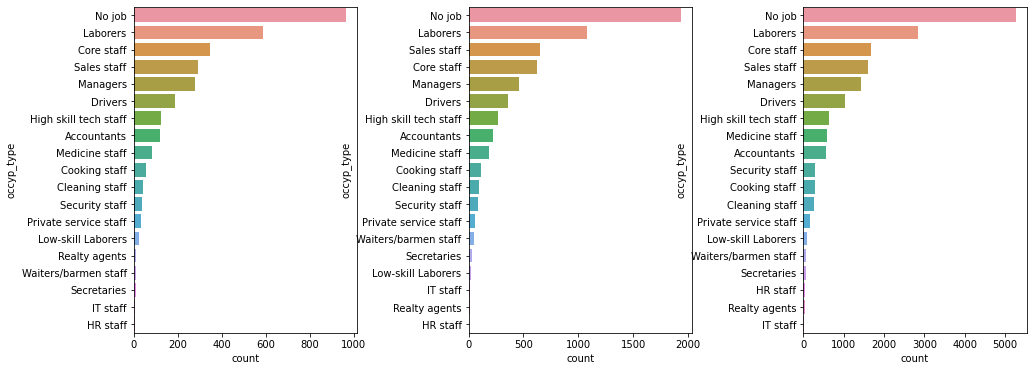

In [73]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.countplot(y = 'occyp_type', data = train_0, order = train_0['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = train_1, order = train_1['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = train_2, order = train_2['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

*There is a change in the ranking of job types for each class.*

### ETC

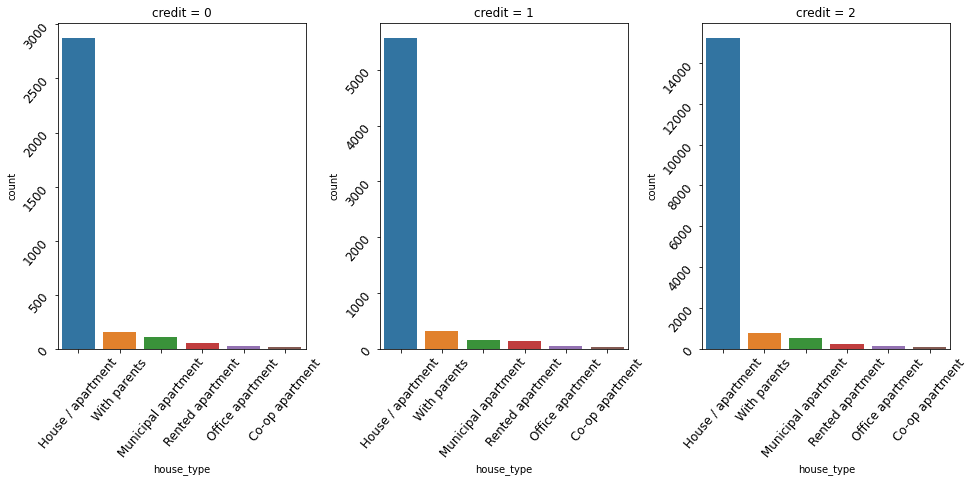

In [75]:
cat_plot('house_type')

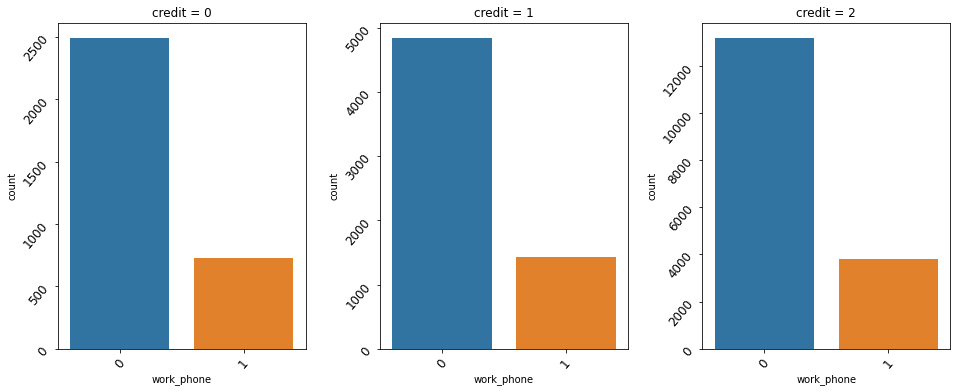

In [76]:
cat_plot('work_phone')

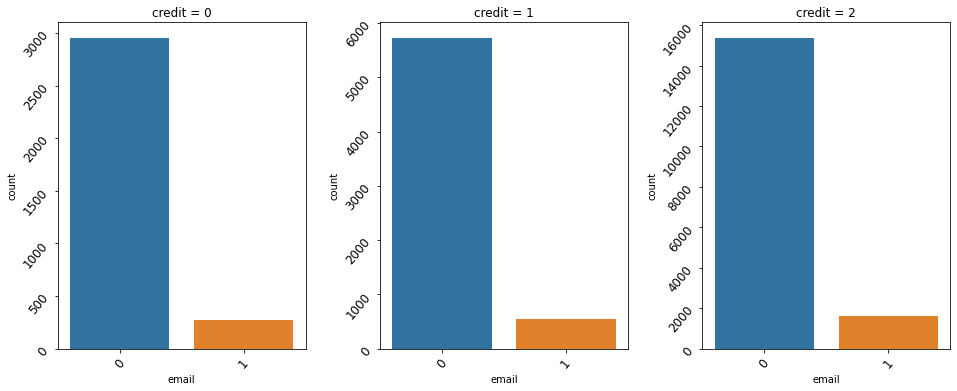

In [77]:
cat_plot('email')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

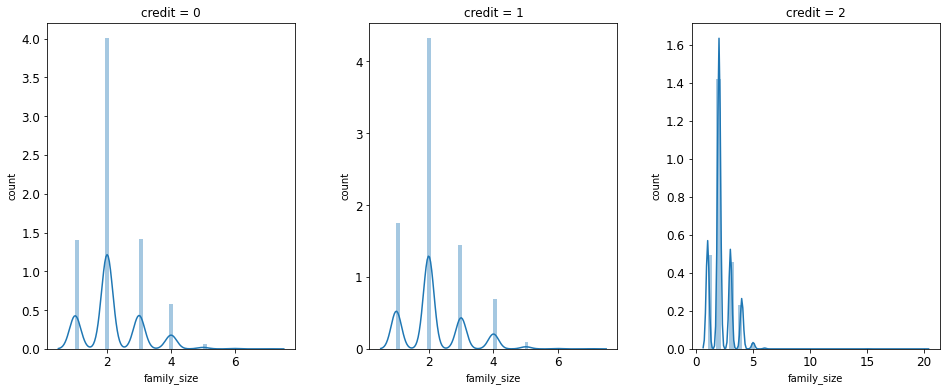

In [78]:
num_plot("family_size")